1. 서울시 각 구별 CCTV 수를 파악하고 인구대비 CCTV 비율을 구해 순위 비교
2. 인구 대비 CCTV 평균치를 확인하고 CCTV가 과하게 부족한 구를 확인
3. 고령자 대비 CCTV 수 확인
4. 외국인 대비 CCTV 수 학인

- 필요한 데이터
- 서울시 지자체별 CCTV 현황 DATA
- 서울시 지자체별 인구 현황 DATA

교재 23쪽


In [1]:
# 데이터 분석을 위해서 반드시 패키지를 import 해야 함
# pandas(데이터 분석), numpy(수치분석) 패키지
# 패키지는 관련 함수 모임
# import 패키지명 -- 패키지명이 길 경우 별명을 생성해서 쓸 수 있다.
# import 패키지명 as 별명

import pandas as pd
import numpy as np

In [2]:
# 데이터 파일 읽어오기
# 01. CCTV_in_Seoul.csv (파일명은 다르면 안된다. 띄어쓰기 주의 할 것)
# 한글 포함여부에 따라 옵션이 달라진다.
# 한글 포함 시 encoding 방식을 지정해 줘야 함.
# utf-8 방식이 있고 : utf-8
# euc-kr 방식 있음 : ansi 방식

# 외부 파일 읽어올 때 경료가 중요(상대 경료 사용이 원칙)
# 사용 data는 내문서\data\
# 코드파일은 내문서\파이썬_1021\코드
# '../data/01.CCTV_in_Seoul.csv'

CCTV_seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')
#데이터 확인하기 위해 위 5줄 출력
CCTV_seoul.head() # 데이터 프레임 형태로 출력

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
# head() 함수 : 데이터프레임의 데이터를 위에서부터 지정된 숫자 만큼 출력
CCTV_seoul.head() # 5줄 출력 (필드제목을 제외하고)
CCTV_seoul.head(10) # 매개변수로 전달된 숫자만큼 출력

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [4]:
CCTV_seoul.tail() # 마지막 5줄 출력(반환)
CCTV_seoul.tail(10) # 마지막 10줄 출력

,기관명,소계,2013년도 이전,2014년,2015년,2016년
15,성동구,1062,730,91,241,265
16,성북구,1464,1009,78,360,204
17,송파구,618,529,21,68,463
18,양천구,2034,1843,142,30,467
19,영등포구,904,495,214,195,373
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
22,종로구,1002,464,314,211,630
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109


In [5]:
# read_csv() 함수는 csv 파일을 읽어와서 데이터프레임 형태로 저장
# 데이터 프레임은 새로 데이터의 제목인 컬럼명이 있고
# 가로 데이터를 구분하는 인덱스를 가지고 있다.

# 데이터프레임의 컬럼명으로 컬럼을 접근하기 때문에 의미있는 컬럼명으로 사용
# 컬럼명만 출력
CCTV_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
# 컬럼명을 의미있게 변경
# reaname 함수 사용 : df.rename(columns={바꿀위치 : 새로운 이름값})
# 기관명 -> 구별
CCTV_seoul.rename(columns={CCTV_seoul.columns[0]:'구별'})

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [7]:
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
# rename 함수는 원본을 변경하지 않는다. 옵션 inplace = False로 되어 있기 때문에
CCTV_seoul.rename(columns={CCTV_seoul.columns[0]:'구별'},inplace=True)
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [9]:
pro_seoul = pd.read_excel('../data/01.population_in_Seoul.xls', encoding='UTF-8')
pro_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [10]:
pop_seoul = pd.read_excel('../data/01.population_in_Seoul.xls', 
                          header = 2, #두 행 skip
                          usecols =  'B,D,G,J,N', # 선택 열만 가져오기
                          encoding='UTF-8')
pop_seoul.head() # 교재 28쪽 PARSECALS를 usecols 로 변경

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


컬럼명 변경 => 0: 구별 1:인구수 2:한국인 3:외국인 4:고령자

In [11]:
pop_seoul.rename(columns={pop_seoul.columns[0] : '구별',
                          pop_seoul.columns[1] : '인구수',
                          pop_seoul.columns[2] : '한국인',
                          pop_seoul.columns[3] : '외국인',
                          pop_seoul.columns[4] : '고령자'}, inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# CCTV 데이터 파악하기

설치대 대수가 작은 5개 구는 어디인가 ? - 소계가 총 설치대수 이므로 소계를 기준으로 sort 한다.
정렬 함수 sort_values(by='기준열이름',ascending=True) : 오름차순 정렬

In [12]:
CCTV_seoul.sort_values(by='소계', ascending=True).head() # 어센딩은 기본값 -> 굳이 안줘도 됨

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [13]:
# CCTV 대수가 많은 5개 구는 어디인가?
# 소계를 기준으로 내림차순 정렬

CCTV_seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [15]:
# CCTV 최근 증가율 계산해서 CCTV '최근증가율' 컬럼을 추가
# 데이터프레임에 컬럼을 추가할 때는 df명['새로 추가될 컬럼명'] = 값들
CCTV_seoul['최근증가율'] = (CCTV_seoul['2014년'] + 
                            CCTV_seoul['2015년'] +
                            CCTV_seoul['2016년']) / CCTV_seoul['2013년도 이전'] * 100

In [16]:
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [17]:
# 3개년간 CCTV 설치 증가율이 높은 5개 구를 출력
CCTV_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [18]:
# 서울시 인구데이터 파악하기 : 사용변수 pop_seoul
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [26]:
# 첫 행 합계는 계산 행 이므로 삭제
# 삭제 함수 : del 명령어 , drop() 함수
# 행 삭제 : drop() 함수
# 열 삭제 : del 명령어

#pop_seoul.drop(0).head() # head 바로 붙히면 안됨
pop_seoul.head() # 함계행(0행) 삭제

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [ ]:
# - 각 구가 모두 데이터로 있는지 확인 작업
# 1. 구가 중복되어 있는지(두번 이상 나타나면 안됨)
# 전체 행 개수를 확인
# 중복 데이터를 제거한 후 행개수를 확인

In [27]:
# 전체 행 개수 확인 : dataframe의 행 개수 확인 함수 (len())
# 서울시 구는 25개 구
len(pop_seoul)

26

In [30]:
# 중복된 데이터는 제거하고 출력하는 함수(unique())
len(pop_seoul['구별'].unique())
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [31]:
# 구별 데이터에 nan 데이터가 들어있음
# nan에 해당하는 행 전체를 삭제 : 구별값이 nan인 행의 인덱스 확인
# nan을 확인하는 함수 df명[필드명].isnull()
# 해당 행을 출력해서 확인

pop_seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [32]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [33]:
# 데이터프레임명[필드명 또는 조건식] : 데이터 행에 접근

In [34]:
# pop_seoul의 26행에 nan 값이 저장되어 있으므로 제거 후 제거되었는지 확인
# pop_seoul.drop([26], inplace=True) # 한번 ㅔㅈ거 후 주석처리 해서 다시 실행되지 않도록 한다.
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [36]:
# 제거 확인
pop_seoul.tail()
len(pop_seoul)

25

In [37]:
# 인구수 대비 외국인과 고령자 비율 계산
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [39]:
# 가공데이터 확인
pop_seoul.head()
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


1. 어느구의 인구가 가장 많은가? 인구가 많은 5개 구 출력
2. 외국인이 많은 5개 구를 출력
3. 인구수 대비 외국인이 많은 5개 구를 출력
4. 고령자가 많은 5개 구를 출력
5. 인구수 대비 고령자가 많은 5개 구를 출력

In [40]:
# 1번
pop_seoul.sort_values(by="인구수", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [41]:
# 2번
pop_seoul.sort_values(by="외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [42]:
# 3번

pop_seoul['인구수 대비 외국인'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul.sort_values(by="인구수 대비 외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191,8.663598
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,7.342345
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,7.007998
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,6.700690
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,6.038828


In [43]:
#4번 

pop_seoul.sort_values(by="고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,1.080540
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,1.033584
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.899091
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.670725
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,3.484582


In [45]:
# 5번

pop_seoul['인구수 대비 고령자'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.sort_values(by="인구수 대비 고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인,인구수 대비 고령자
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797,3.723221,14.720797


cctv 데이터 가공필드와 인구 데이터 가공필드 완성
인구대비 cctv 수의 적정성 확인하기 위해
두 변수를 병합해서 분석해야 한다.

In [46]:
# 두 변수 병합하기 위해서는 병합 위한 키를 찾기 : 공통필드

In [47]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인,인구수 대비 고령자
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,4.017852,11.342849


In [48]:
# CCTV_Seoul과 pop_seoul 병합코드
# 공통 컬럼인 '구별' 컬럼으로 조인
# 양쪽 모두 25개의 구로 이루어져 있음

# merge 함수
# pd.merge(조인할 df1, 조인할 df2, on='공통필드')
data_result = pd.merge(CCTV_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인,인구수 대비 고령자
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,3.484582,12.955291


사용하지 않을 컬럼을 삭제
CCTV의 소계와 최근 증가율을 제외한 년도 관련 DATA는 삭제

In [49]:
# 열삭제 : del 명령어는 원본 반영됨
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [50]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인,인구수 대비 고령자
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,3.484582,12.955291


In [51]:
# 그래프 그릴때 축데이터를 ㅜ십게 지정하기 위해서 행 인덱스를 구별로 변경
# 행인덱스 지정 함수 : set_index('지정열 이름', inplace=True)

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인,인구수 대비 고령자
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,3.484582,12.955291


다수의 데이터 중 상관관계가 가장 큰 데이터를 비교
인구와 관련된 각 필드와 CCTV 소계와의 상관 계수를 파악한 후 의미있는 그래프 표현

상관계수 : 두 변수의 관련성을 확인하는 방법 중의 하나
    절대값이 클수록 두 데이터는 관련이 있다고 봄
    절대값을 기준으로 0.1이하 무시
    0.3 이하 약한 상관 관계
    0.7 이상 강한 상관 관계
    
상관관계 파악 변수(컬럼)
CCTV 총 대수와 인구수
CCTV 총 대수와 고령자 비율
CCTV 총 대수와 외국인 비율

계산 함수 numpy 패키지 corrcoef(데이터1, 데이터2)

In [52]:
# CCTV 총 대수와 인구 수 상관관계 확인
np.corrcoef(data_result['소계'], data_result['인구수'])
# 약한 상관관계 -> 그래프로 표현

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [53]:
# CCTV 총 대수와 고령자 비율 상관관계 확인
np.corrcoef(data_result['소계'], data_result['고령자비율'])
# 약한 음의 상관관계

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [54]:
# CCTV 총 대수와 외국인 비율 상관관계 확인
np.corrcoef(data_result['소계'], data_result['외국인비율'])
# 약한 음의 상관관계

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

cctv와 인구현황 그래프 그리기

In [56]:
# 파이썬의 그래프 그리는 모듈(패키지) : matplotlib.pyplot
# 서브패키지 pyplot 이용
import matplotlib.pyplot as plt

In [57]:
# 그래프는 새 창이 뜨면서 드로잉을 하는데
# 새 창 띄우지 말고 소스코드 안에서 드로잉하라는 명령
%matplotlib inline 

In [58]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [59]:
# 사용 data
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수 대비 외국인,인구수 대비 고령자
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,3.484582,12.955291


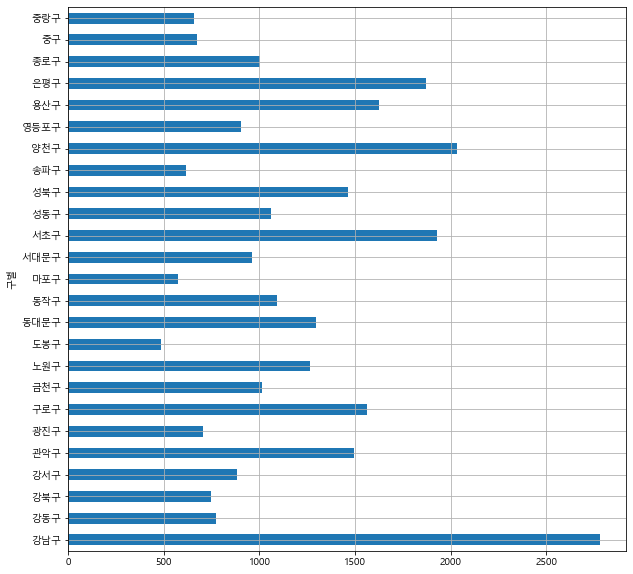

In [61]:
# 구별 cctv 설치 대수를 그래프로 표현
# 수평 막대 그래프
# 전체 그림 크기(그림영역 설정 plt.figure(figsize))
plt.figure(figsize=(10,10))
# 그래프 그리기 plot(kind=그래프 종류값, grid=T/F(격자무늬설정))
data_result['소계'].plot(kind='barh', grid=True)
plt.show()

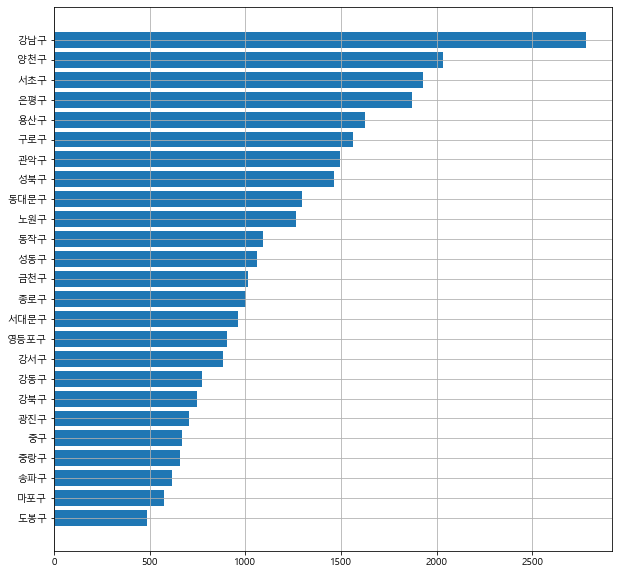

In [64]:
# 구별 cctv 설치대수 그래프
# 수평막대그래프 - 정렬해서 그래프 출력
s = data_result['소계'].sort_values()
s # 시리즈로 반환(1차원 배열) - 인덱스가 존재
plt.figure(figsize=(10,10))
plt.barh(s.index,s)
plt.grid()
plt.show()